# 2019 Labour Day Analysis on Twitter
### gyleodhis@outlook.com
### Analysis By: [@gyleodhis](https://www.twitter.com/gyleodhis)
### ![@labourday](labourDay.jpeg)
#### Licence:
You can use this code for anything you may wish only leave this page:
__AS IS; HOW IS, WHERE IS__

In [1]:
import tweeter # This module contains the code for connecting to twiter and downloading the tweets.
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

In [2]:
pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

## Reading the Tweets

labour = pd.read_csv('labourDay.csv')
#labour.shape
#labour.columns
labour.head()

### How many tweets have we downloaded
__The code below shows that we have pulled down 32K tweets.__

In [3]:
labour.shape

(32231, 5)

### Let us Convert the time the tweets were created into the index of the dataframe
__First we convert the "Created_at" column into pandas datetime dataframe__

In [4]:

labour['Created_at'] =  pd.to_datetime(labour['Created_at'])
#labour.dtypes
#labour["Created_at"].value_counts()
labour.index = labour['Created_at']
labour = labour.drop(columns=['Created_at','Location'])
labour.head()

,Retweet_Count,Favorite_Count,Tweet
Created_at,,,
2019-05-01 06:58:31,0,0,Our creativity is turned into beauty only because of a Labour. Happy #LabourDay \n\n#ShipraCreation #Labour… https://t.co/dFYfSucEJi
2019-05-01 06:58:31,0,0,Home truth\n#LabourDay https://t.co/2VmVSrpCpm
2019-05-01 06:58:30,0,0,Wishing you all a very Happy #MaharashtraDay &amp; #LabourDay...\n.\n.\n#महाराष्ट्रदिन #कामगारदिन #propertymonk… https://t.co/VH2MPhufc1
2019-05-01 06:58:29,0,0,"“One’s destination is never a place, but a new way of seeing things.” \n\nFollow @xceltrip for more!\n\nPlace: Mangkune… https://t.co/boMsVNzqmf"
2019-05-01 06:58:26,2241,0,RT @peaceforchange: World is incomplete without hard work of Labours. One way or the other we all contribute as per our role &amp


## At what time were most tweets tweeted
__We can see that the highest number of tweeting occured at around 4:30 am__

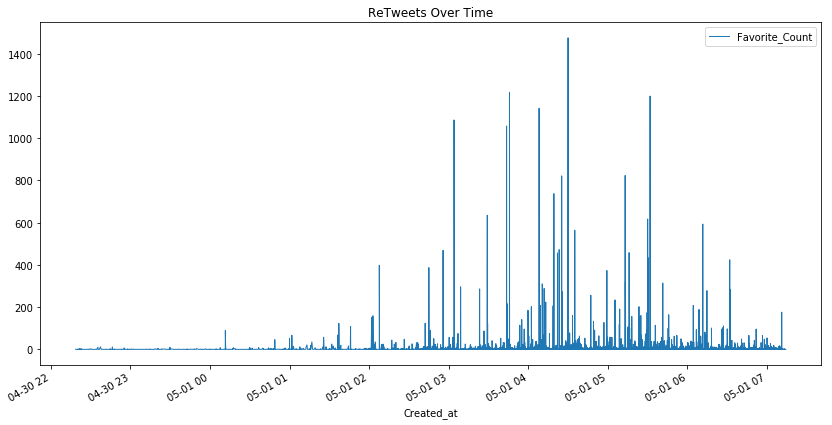

In [5]:
labour[['Favorite_Count']].plot(linewidth=1, figsize=(14,7), title="ReTweets Over Time")

### The average total length of the tweets
__We can see that most tweets were 140 characters.__

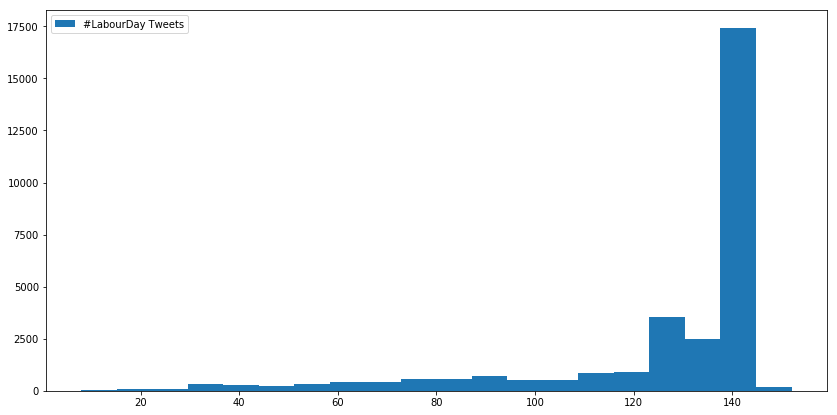

In [6]:
length_labour = labour['Tweet'].str.len() 
plt.figure(figsize=(14,7))
plt.hist(length_labour, bins=20, label="#LabourDay Tweets") 
plt.legend() 
plt.show()

Given below is a user-defined function to remove unwanted text patterns from the tweets.

## Cleaning the Tweets
#### The code below uses REGEX to remove unwanted texts

In [8]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

We will be following the steps below to clean the raw tweets in out data.

- We will remove the twitter handles as they are already masked as @user due to privacy concerns. These twitter handles hardly give any information about the nature of the tweet.

- We will also get rid of the punctuations, numbers and even special characters since they wouldn’t help in differentiating different types of tweets.

- Most of the smaller words do not add much value. For example, ‘pdx’, ‘his’, ‘all’. So, we will try to remove them as well from our data.

- Lastly, we will normalize the text data. For example, reducing terms like loves, loving, and lovable to their base word, i.e., ‘love’.are often used in the same context. If we can reduce them to their root word, which is ‘love’. It will help in reducing the total number of unique words in our data without losing a significant amount of information.



### Removing Twitter Handles (@user)

In [9]:
labour['tidy_tweet'] = np.vectorize(remove_pattern)(labour['Tweet'], "@[\w]*") 
labour.head()

,Retweet_Count,Favorite_Count,Tweet,tidy_tweet
0,0,0,Our creativity is turned into beauty only because of a Labour. Happy #LabourDay \n\n#ShipraCreation #Labour… https://t.co/dFYfSucEJi,Our creativity is turned into beauty only because of a Labour. Happy #LabourDay \n\n#ShipraCreation #Labour… https://t.co/dFYfSucEJi
1,0,0,Home truth\n#LabourDay https://t.co/2VmVSrpCpm,Home truth\n#LabourDay https://t.co/2VmVSrpCpm
2,0,0,Wishing you all a very Happy #MaharashtraDay &amp; #LabourDay...\n.\n.\n#महाराष्ट्रदिन #कामगारदिन #propertymonk… https://t.co/VH2MPhufc1,Wishing you all a very Happy #MaharashtraDay &amp; #LabourDay...\n.\n.\n#महाराष्ट्रदिन #कामगारदिन #propertymonk… https://t.co/VH2MPhufc1
3,0,0,"“One’s destination is never a place, but a new way of seeing things.” \n\nFollow @xceltrip for more!\n\nPlace: Mangkune… https://t.co/boMsVNzqmf","“One’s destination is never a place, but a new way of seeing things.” \n\nFollow for more!\n\nPlace: Mangkune… https://t.co/boMsVNzqmf"
4,2241,0,RT @peaceforchange: World is incomplete without hard work of Labours. One way or the other we all contribute as per our role &amp,RT : World is incomplete without hard work of Labours. One way or the other we all contribute as per our role &amp


###  Removing Punctuations, Numbers, and Special Characters

In [10]:
labour['tidy_tweet'] = labour['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
labour['tidy_tweet'] = labour['tidy_tweet'].str.replace("[https://]", " ")
labour['tidy_tweet'].head(30)

0               Our crea ivi y i   urned in o beau y only becau e of a Labour  Ha  y #LabourDay   #S i raCrea ion #Labour            co dFYfSucEJi
1                                                                                                    Home  ru   #LabourDay           co  VmVSr C m
2            Wi  ing you all a very Ha  y #Ma ara   raDay  am   #LabourDay        #              #          # ro er ymonk            co VH MP ufc 
3               One   de  ina ion i  never a  lace  bu  a new way of  eeing   ing      Follow  for more   Place  Mangkune            co boM VNzqmf
4                               RT   World i  incom le e wi  ou   ard work of Labour   One way or   e o  er we all con ribu e a   er our role  am 
5                                RT   #MayDay #LabourDay S ecial T ala a  y VIJAY Movie      #T eri A      PM In     #Mer al A   PM In    S ecial 
6                RT   Ju    ymbol for Eli e   a  we are feel  ym a  y for labour   o   a   y   ey Announce off on   da

###  Removing Short Words
I have decided to remove all the words having length 3 or less. For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them.

In [11]:
labour['tidy_tweet'] = labour['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
labour.head()

,Retweet_Count,Favorite_Count,Tweet,tidy_tweet
0,0,0,Our creativity is turned into beauty only because of a Labour. Happy #LabourDay \n\n#ShipraCreation #Labour… https://t.co/dFYfSucEJi,crea urned beau only becau Labour #LabourDay raCrea #Labour dFYfSucEJi
1,0,0,Home truth\n#LabourDay https://t.co/2VmVSrpCpm,Home #LabourDay VmVSr
2,0,0,Wishing you all a very Happy #MaharashtraDay &amp; #LabourDay...\n.\n.\n#महाराष्ट्रदिन #कामगारदिन #propertymonk… https://t.co/VH2MPhufc1,very raDay #LabourDay ymonk
3,0,0,"“One’s destination is never a place, but a new way of seeing things.” \n\nFollow @xceltrip for more!\n\nPlace: Mangkune… https://t.co/boMsVNzqmf",never lace eeing Follow more Place Mangkune VNzqmf
4,2241,0,RT @peaceforchange: World is incomplete without hard work of Labours. One way or the other we all contribute as per our role &amp,World incom work Labour ribu role


### Text Normalization

Before we normalize the tweets we will have to tokenize the tweets.

In [12]:
tokenized_tweet = labour['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_tweet.head()

0    [crea, urned, beau, only, becau, Labour, #LabourDay, raCrea, #Labour, dFYfSucEJi]
1                                                            [Home, #LabourDay, VmVSr]
2                                                     [very, raDay, #LabourDay, ymonk]
3                          [never, lace, eeing, Follow, more, Place, Mangkune, VNzqmf]
4                                             [World, incom, work, Labour, ribu, role]
Name: tidy_tweet, dtype: object

### Now we can now normalize the tokenized tweets.


In [13]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

### Now let’s stitch these tokens back together. It can easily be done using nltk’s MosesDetokenizer function.

In [14]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
labour['tidy_tweet'] = tokenized_tweet

## Understanding the common words used in the tweets: WordCloud
Let’s visualize all the words our data using the wordcloud plot.

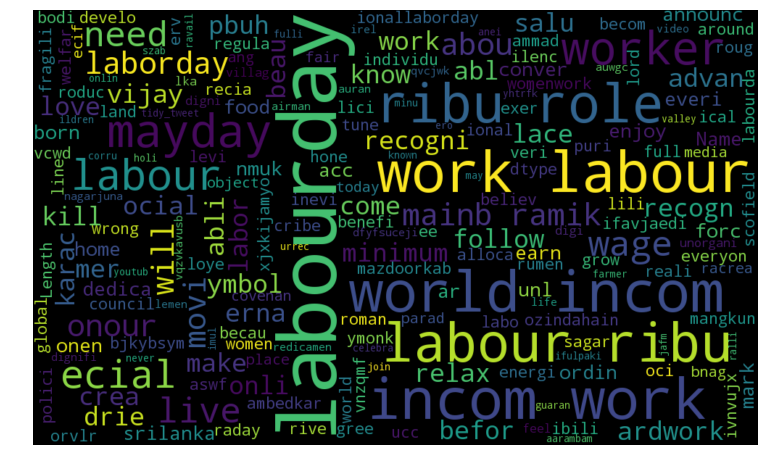

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=600, random_state=70, max_font_size=110).generate(str(tokenized_tweet)) 
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### The bigger the word the more it was used in this hastag

### The impact of Hashtags on tweets sentiment
__The fucntion below is used to collect the most used hastag__

In [16]:
# function to collect hashtags 
def hashtag_extract(x):
    hashtags = []    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
        return hashtags
# extracting hashtags from non racist/sexist tweets 
HT_regular = hashtag_extract(labour['tidy_tweet']) 
HT_regular = sum(HT_regular,[])

__Now that we have prepared our lists of hashtags, we can plot the top ‘n’ hashtags__

### Most Common Hashtags in Relation to Labour Day

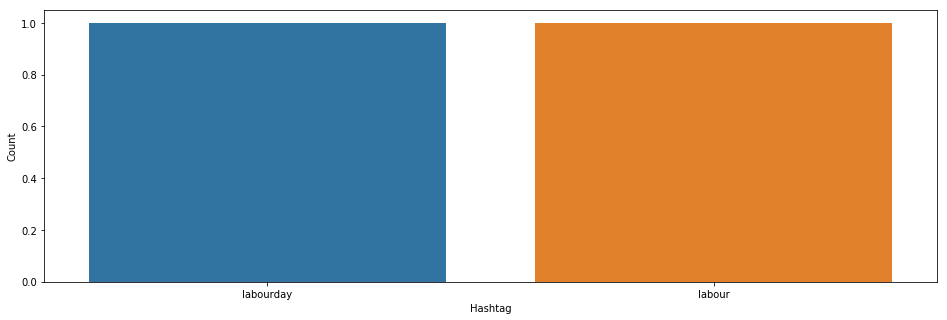

In [17]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

## That's it guys.
### My sismple analysis of the #labourday hastag.
### Comments and suggestions are welcomed
### Bye people.